In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

###  Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the `date` column.

In [44]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv(
    "./fcc-forum-pageviews.csv",
    parse_dates=["date"],
    index_col="date",
)
# df.index = pd.to_datetime(df.index)

### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [45]:
# Clean data
mask = (df["value"] > df["value"].quantile(0.025)) & (
    df["value"] < df["value"].quantile(0.975)
)

df = df[mask]

### Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to this
<figure>
    <center> <img src="./examples/Figure_1.png" width="1200"> <center>
</figure>

The title should be `Daily freeCodeCamp Forum Page Views 5/2016-12/2019`. The label on the x axis should be `Date` and the label on the y axis should be `Page Views`.

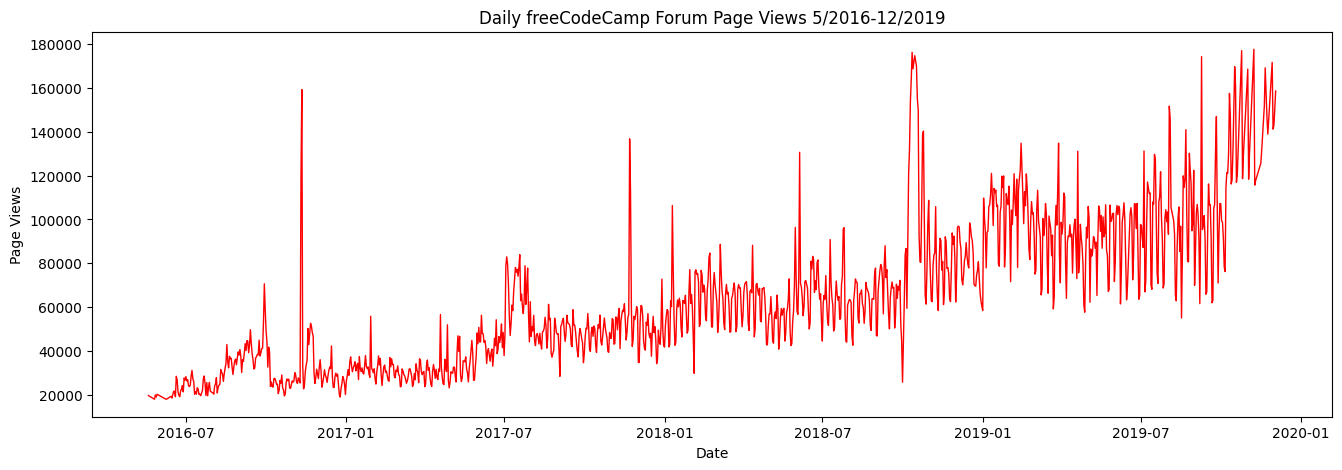

In [46]:
# Draw Line Plot
def draw_line_plot():
    fig, axes = plt.subplots(figsize=(16, 5))
    axes.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    axes.set_ylabel("Page Views")
    axes.set_xlabel("Date")
    axes.plot(
        df.index,
        df["value"],
        linestyle="solid",
        color="red",
        linewidth=1,
    )

    fig.savefig("line_plot.png")
    return fig


fig = draw_line_plot()

### Create a `draw_bar_plot` function that draws a bar chart similar to this 
<figure>
    <center> <img src="./examples/Figure_2.png" width="800"> </center>
</figure>

It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of `Months`. On the chart, the label on the x axis should be `Years` and the label on the y axis should be `Average Page Views`.

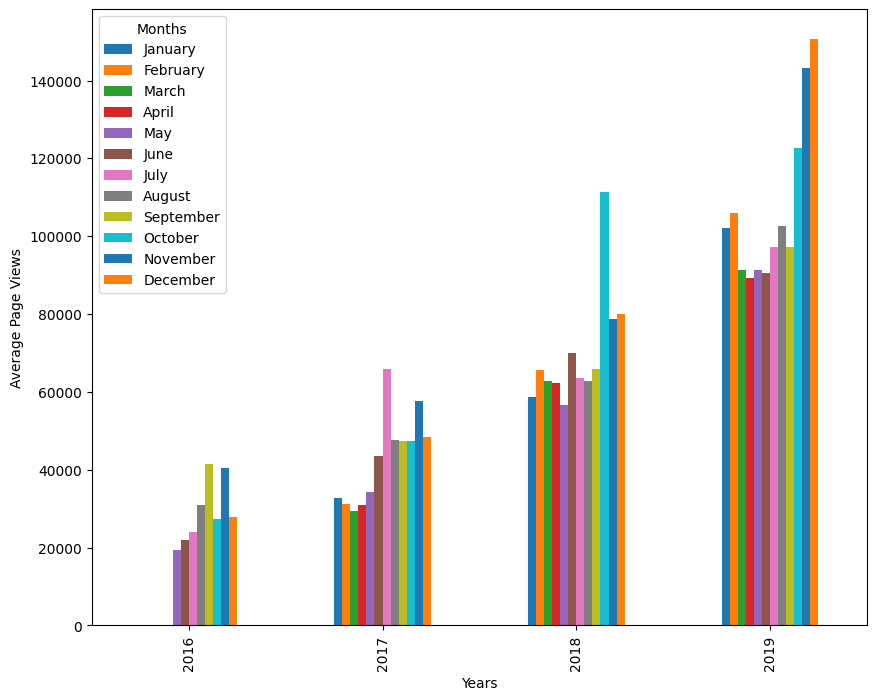

In [47]:
from calendar import month_name


def draw_bar_plot():
    df_bar = df.copy(deep=True)
    df_bar["year"] = df_bar.index.year
    df_bar["month"] = df_bar.index.month_name()

    # Slice to skip the empty string in month_name at index 0
    months = list(month_name)[1:]
    # Convert month column to categorical using months as the available classes
    df_bar["month"] = pd.Categorical(df_bar["month"], categories=months)

    df_pivot_table = pd.pivot_table(
        data=df_bar,
        index="year",
        columns="month",
        values="value",
        aggfunc="mean",
        observed=False,
    )

    fig, ax = plt.subplots(figsize=(10, 8))
    df_pivot_table.plot(kind="bar", ax=ax)

    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    ax.legend(title="Months")

    fig.savefig("bar_plot.png")
    return fig


fig = draw_bar_plot()

### Create a `draw_box_plot` function that uses Seaborn to draw two adjacent box plots similar to 
<figure>
    <center> <img src="./examples/Figure_3.png" width="1200"> </center>
</figure>

These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be `Year-wise Box Plot (Trend)` and the title of the second chart should be `Month-wise Box Plot (Seasonality)`. Make sure the month labels on bottom start at `Jan` and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

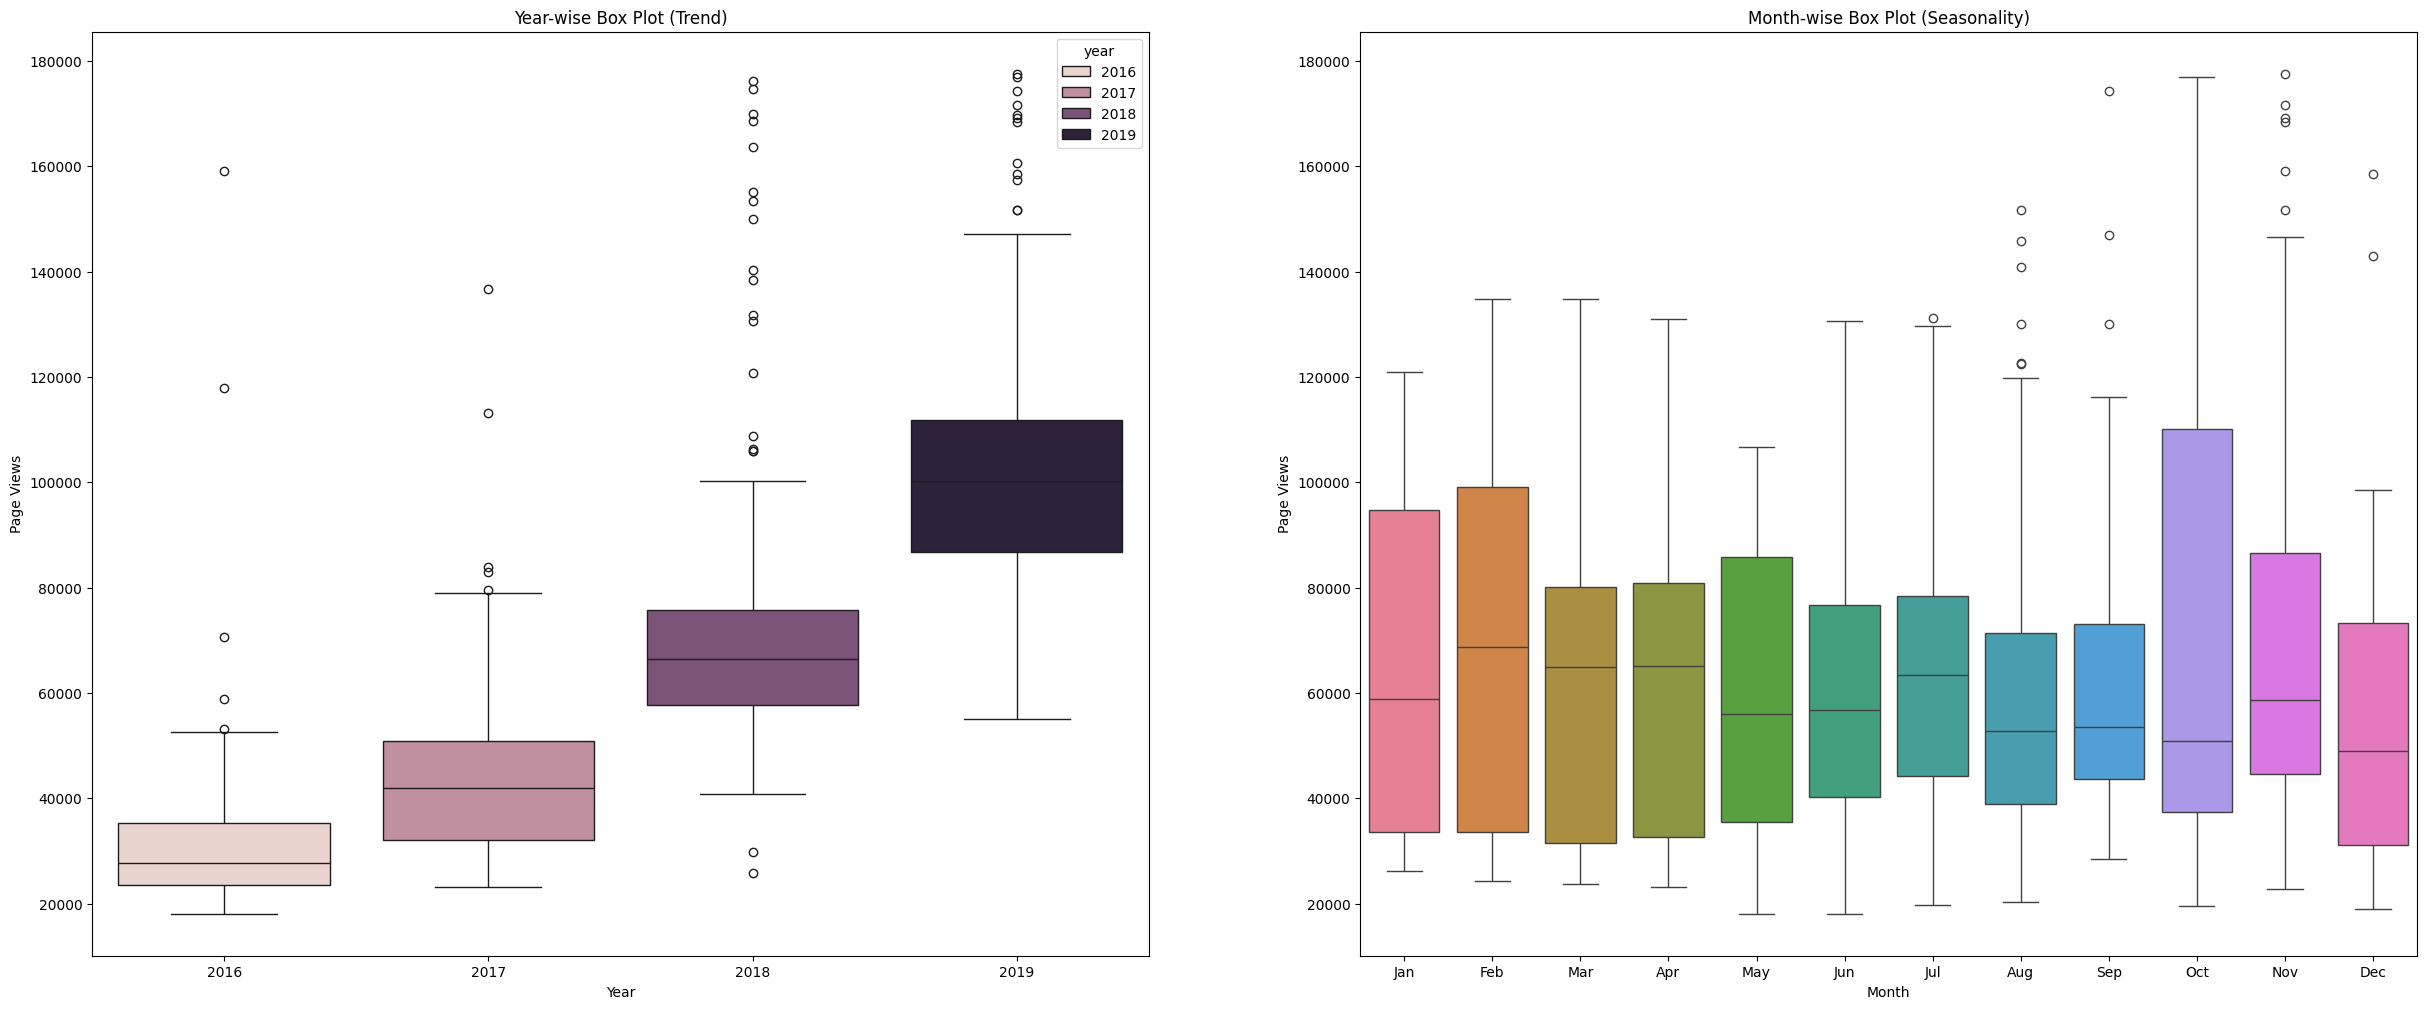

In [52]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box["year"] = [d.year for d in df_box.date]
    df_box["month"] = [d.strftime("%b") for d in df_box.date]

    df_box["month_number"] = df_box["date"].apply(lambda x: x.month)
    df_box = df_box.sort_values("month_number")
    df_box.drop("month_number", axis=1, inplace=True)

    plot_objects = plt.subplots(nrows=1, ncols=2, figsize=(30, 12))
    fig, (ax1, ax2) = plot_objects
    ax1.set(title="Year-wise Box Plot (Trend)", xlabel="Year", ylabel="Page Views")
    sns.boxplot(
        x="year",
        y="value",
        data=df_box,
        ax=ax1,
        hue="year",
    )

    ax2.set(
        title="Month-wise Box Plot (Seasonality)", xlabel="Month", ylabel="Page Views"
    )
    sns.boxplot(
        x="month",
        y="value",
        data=df_box,
        ax=ax2,
        hue="month",
    )

    return fig


fig = draw_box_plot()